# Сборный проект

# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  

Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Шаг 1. Изучение общей информации

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats as st


In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# получение общей информации о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Вывод по ознакомлению с данными:

- Всего в таблице 16 715 строк и 11 колонок. В шести колонках имеются пропуски в данных:  
    - Name; 
    - Year_of_Release; 
    - Genre; 
    - Critic_Score; 
    - User_Score Rating.
    
    
- Названия колонок имеют нарушение стилей: названия столбцов необходимо привести к нижнему регистру. 


- Ряд колонок имеет неверный тип. Заменим тип данных столбцов:  
    - Year_of_Release и Critic_Score на int; 
    - столбец User_Score, который имеет тип данных object, преобразуем в float.
    
    
- Данных достаточно для проведения исследования

## Шаг 2.  Предобработка данных

2.1 Замена названия столбцов (приведение к нижнему регистру)

In [4]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
#Переименование столбцов
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

2.2 Удаление дубликатов

In [6]:
data.duplicated().sum()

0

In [7]:
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [8]:
# Создание общей функции для вывода уникальных значений по каждому столбцу 
def uniq_columns(data_frame): 
    for column in data_frame.columns:
        print('Уникальные значения столбца', column)
        print(data_frame[column].unique())
        print('Количество NAN столбца', column)
        print(data_frame[column].isna().sum())

In [9]:
uniq_columns(data)

Уникальные значения столбца name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Количество NAN столбца name
2
Уникальные значения столбца platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Количество NAN столбца platform
0
Уникальные значения столбца year_of_release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
Количество NAN столбца year_of_release
269
Уникальные значения столбца genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Количество NAN столбца genre
2
Уникальные значения с

2.3 Обработка пропусков

In [10]:
#Уточним количество пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Пропуски в стобцах name и genre**

In [11]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Одинаковые строчки с пропусками в name и genre.  
Считаю, что можно удалить эти строки, т.к. их всего 2 и данные в них не подлежат восстановлению.

In [13]:
data = data.dropna(subset = ['name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Пропуски в столбце year_of_release**

In [14]:
data['year_of_release'].isna().sum()

269

In [15]:
(data[data['year_of_release'].isna()].shape[0] / data['year_of_release'].shape[0])

0.016095255190570215

In [16]:
'{:.1%}'.format(0.016)

'1.6%'

В 1.6 % данных вне указан год выпуска игры. Учитывая их малый процент, считаю возможным их удалить. 

In [17]:
data = data.dropna(subset = ['year_of_release'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Пропуски в столбце critic_score и user_score**

In [18]:
data['critic_score'].isna().sum() / len(data['name'])*100

51.453417659936754

In [19]:
data['user_score'].isna().sum() / len(data['name'])*100

40.166626125030405

Количество пропусков в столбцах user_score и critic_scoreбольше 50 % и 40%. Заменить их на медиану и среднее нецелесообразно.  
Аббревиатуру "tbd" заменим на NaN, т.к. она означает, недостаточное количество оценок для выставления общей.

In [20]:
data['user_score']=data['user_score'].replace({'tbd':np.NaN})

In [21]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

In [22]:
data['critic_score']=data['critic_score'].replace({'tbd':np.NaN})

In [23]:
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

**Пропуски в столбце rating**

In [24]:
data['rating'].isna().sum() / len(data['name'])*100

40.59839455120409

Количество пропусков больше 40 %. Заменить на медиану и среднее нецелесообразно.  
Пометим что возрастная категория неизвестна "unknown"

In [25]:
data['rating'] = data['rating'].fillna('unknown')
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

2.4 Замена типа данных

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [27]:
data = data.astype({"critic_score": "float64"})
data = data.astype({"year_of_release": "Int64"}) 
data = data.astype({"user_score": "float64"})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


2.5 Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [28]:
# Метод sum(axis=0) суммирует значения по каждому столбцу, возвращая серию с суммами для каждого столбца,
# автоматически игнорирует NaN значения при суммировании. 
# Если строка содержит NaN значение, оно не учитывается в сумме для этой строки

data['total_sales'] = data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


**Вывод по предобработке данных:**

1. Явные дубликаты не обнаружены  
2. По столбцу <span style="color:blue">name</span> удалены 2 строки с пропусками  
По столбцу <span style="color:blue">year_of_release</span> принято решение удалить строки с пропусками  
В столбце <span style="color:blue">critic_score</span> количество пропусков больше 51% они обозначены NaN  
В столбце <span style="color:blue">user_score</span> количество пропусков больше 40% они обозначены NaN, неописанное значение tbd обозначено как NaN  
В столбце <span style="color:blue">rating</span> пропуски обозначены как unknown  
Столбцы <span style="color:blue">year_of_release, critic_score</span> приведены к int64 типу, user_score к float64 в соответствии с данными содержащимися в них.  
Пропуски могли появиться из за сбора данных из различных источников, которые не согласованы между собой.
Посчитали суммарные продажи во всех регионах записали в <span style="color:blue">total_sales</span>  

## Шаг 3.  Исследовательский анализ данных

3.1 Проверим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды

In [29]:
data_years = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
data_years.columns = ['games']
data_years

,games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


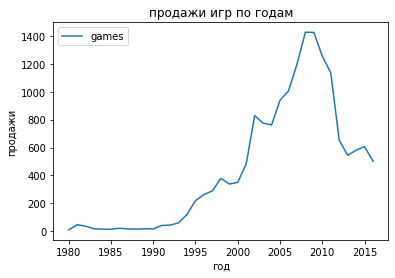

In [30]:
data_years.plot();

# Добавление заголовка и подписей осей
plt.title('продажи игр по годам')
plt.xlabel('год')
plt.ylabel('продажи')

# Показать график
plt.show()

**<font color="maroon">Спасибо, поправила</font>**

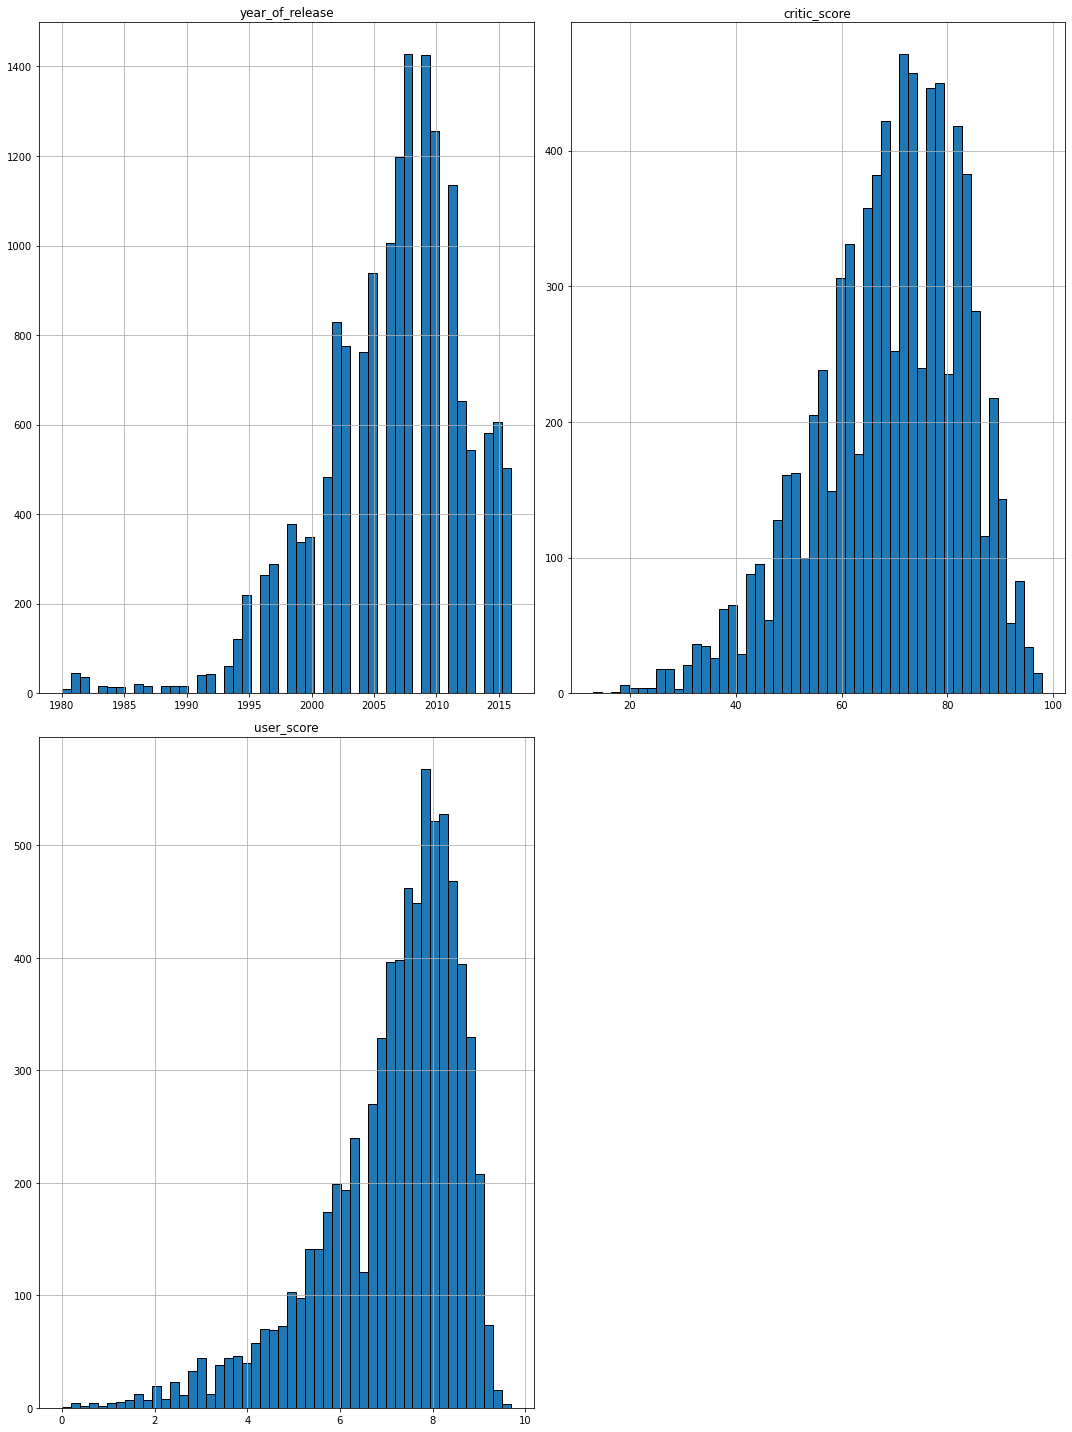

In [31]:
columns_to_plot = ['year_of_release', 'critic_score', 'user_score']
data[columns_to_plot].hist(figsize=(15, 20), bins=50, edgecolor='black')

plt.tight_layout()
plt.show()

Вывод по пункту 3.1:  
1. В таблице представлены игры с годом выпуска с 1980 по 2016 год.
2. Присутствуют игры у которых не указан год выпуска в количестве 269
3. Рост числа выпуска игр приходится на 1995 год, с максимумом примерно в 2008 - 2009 годах, после чего прослеживается спад.
4. С 2012 года объем выпуска игр относительно стабилизировался и год от года отличается несильно.

В целях исследования следует выбирать период в 5 - 10 лет (старые игры забываются, новые сильнее влияют на рынок).

3.2 Посмотрим, как менялись продажи по платформам.  
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.  
За какой характерный срок появляются новые и исчезают старые платформы?

Составим таблицу с общей суммой продаж по каждой платформе.

In [32]:
data_sales = pd.pivot_table(data, index=['platform'], values='total_sales', aggfunc='sum')
data_sales = data_sales.sort_values('total_sales',ascending=False)
data_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [33]:
top_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index().head(6)['platform'].tolist()
top_sales

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Построим распределение по платформам

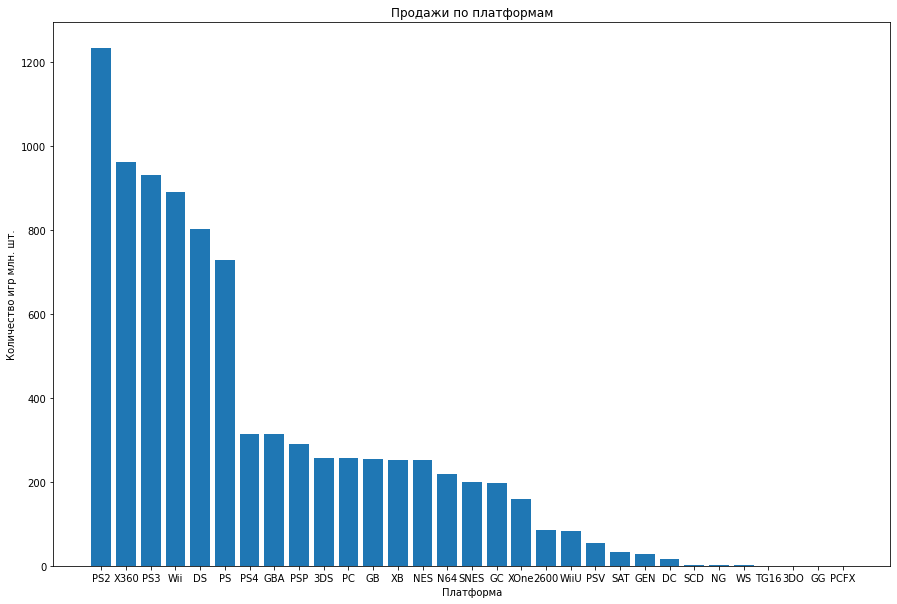

In [34]:
plt.figure(figsize=(15,10))
plt.bar(data_sales.index, data_sales['total_sales'])
plt.title('Продажи по платформам')
plt.xlabel("Платформа");
plt.ylabel("Количество игр млн. шт.");

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

<Figure size 1080x720 with 0 Axes>

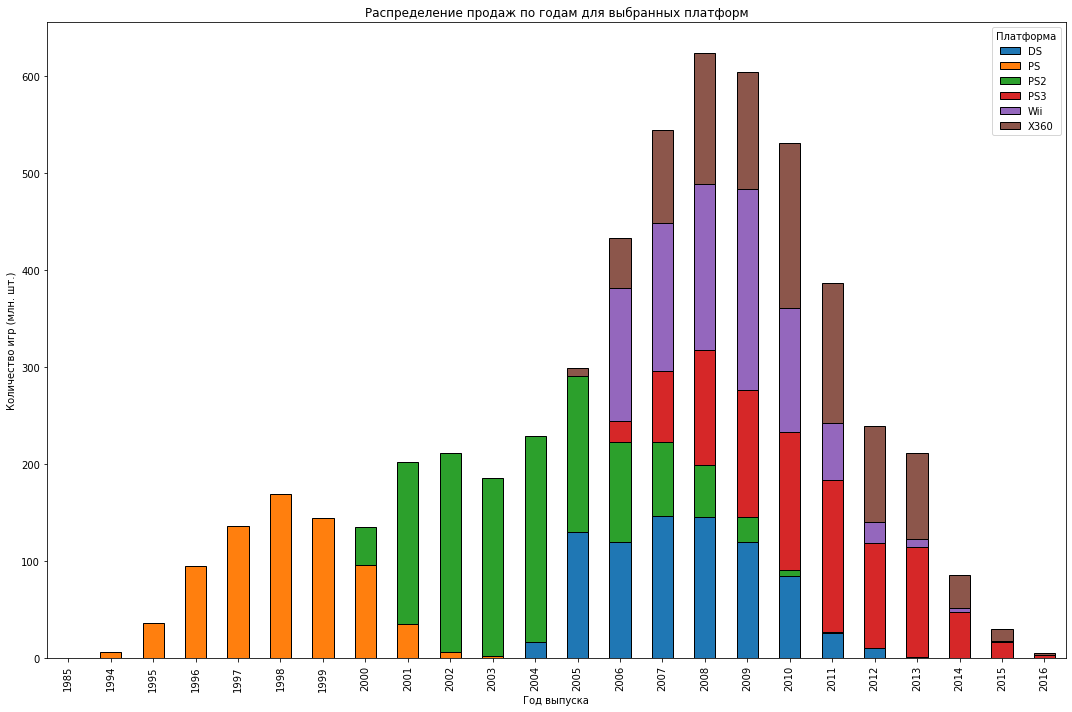

In [35]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
filtered_data = data[data['platform'].isin(platforms)]

# Сгруппировать данные по годам и платформам и суммировать продажи
grouped_data = filtered_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Построить график
plt.figure(figsize=(15, 10))
grouped_data.plot(kind='bar', stacked=True, figsize=(15, 10), edgecolor='black')

plt.title('Распределение продаж по годам для выбранных платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр (млн. шт.)')
plt.legend(title='Платформа')
plt.tight_layout()
plt.show()

Посмотрим, за какой характерный срок появляются новые и исчезают старые платформы.  

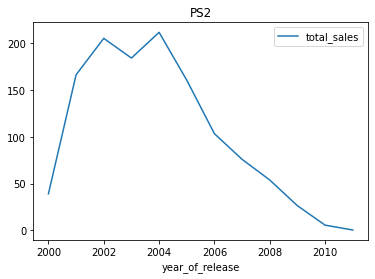

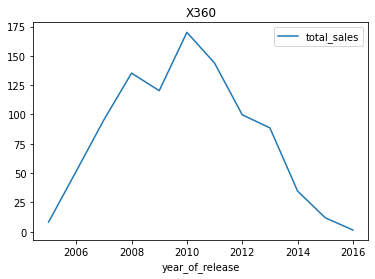

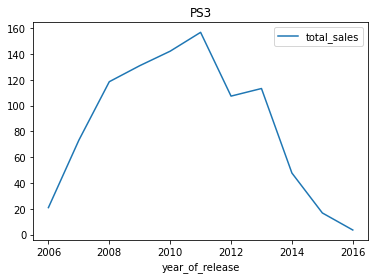

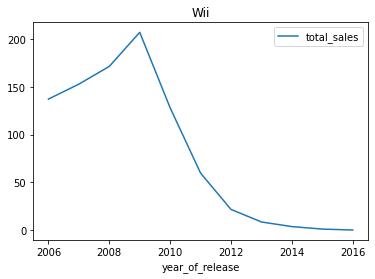

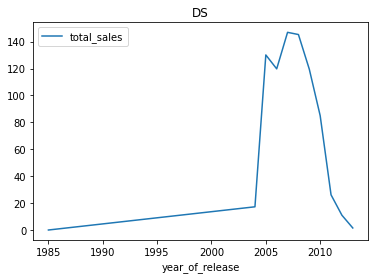

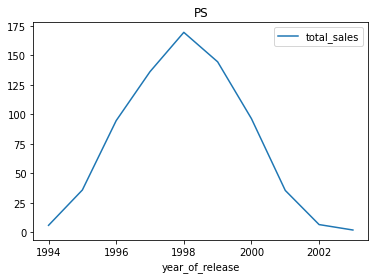

In [36]:
for platform in platforms:
    platform_sales = pd.pivot_table(data.query('platform == @platform'), index=['year_of_release'], values='total_sales', aggfunc='sum')
    platform_sales.plot();
    plt.title(platform)

In [37]:
time_life = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
# в срок жизни платформы, должны входить границы диапазона, поэтому +1
time_life['life'] = time_life['max'] - time_life['min'] + 1 
print('Медианное значение жизненного цикла по всей выборке', time_life['life'].median(), 'лет')

Медианное значение жизненного цикла по всей выборке 7.0 лет


In [38]:
time_life = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
# в срок жизни платформы, должны входить границы диапазона, поэтому +1
time_life['life'] = time_life['max'] - time_life['min'] + 1 
print('Среднее значение жизненного цикла по всей выборке', time_life['life'].mean(), 'лет')

Среднее значение жизненного цикла по всей выборке 8.612903225806452 лет


Вывод по исследованию платформ:

Из графиков видно, что от срока появления платформы до их исчезновения как правило проходит 10 лет.  
Если быть более точными, то:
- 7 лет - медианное значение ЖЦ платформы;  
- 9 лет - среднее значение ЖЦ платформы.

3.3 Возьмем данные за соответствующий актуальный период.  
Актуальный период определим как 2012 - 2016, сделанный на основе исследований предыдущих вопросов.  

Почему 2012? Потому что в период с 1995 наблюдается рост числа выпуска игр, с максимумом в 2008 - 2009 годах, после чего прослеживается спад. А с 2012 года объем выпуска игр относительно стабилизировался и год от года отличается несильно.  

На основе данных за период с 2012 по 2016 будем строить прогноз на 2017 год.

In [39]:
current_period = data[data['year_of_release'] > 2011]
current_period.info()
current_period.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   Int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           2886 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 295.9+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


**<font color="maroon">Согласна, но, сейчас это не ошибка? я могу оставить как есть?</font>**

3.4 Определим, какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [40]:
current_period_sales = pd.pivot_table(current_period, index=['platform','year_of_release'], 
                                     values='total_sales', aggfunc = 'sum')
current_period_sales

total_sales
platform year_of_release             
3DS      2012                   51.36
         2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2012                   11.01
         2013                    1.54
PC       2012                   23.22
         2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2012                  107.36
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2012                    7.69
         2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2012                   16.19
         2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2012                   21.71
         2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2012                   17.56
         2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

In [41]:
current_period_sales_platform = pd.pivot_table(current_period_sales, index='platform', values='total_sales', aggfunc = 'sum')
current_period_sales_platform.sort_values('total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


In [42]:
# значение t
t = 4
actual_platforms = (data
    .query('year_of_release >= 2016-@t') # отфильтруем данные по году выпуска в data, оставляя только те, где год выпуска (year_of_release) 2016−t.
    .pivot_table(index='platform', values='total_sales', aggfunc='sum') # создаем сводную таблицу, где индексом является platform, а значением — суммарные продажи (total_sales). Для каждой платформы вычисляется сумма продаж.
    .sort_values(by='total_sales', ascending=False) # сортируем платформы по суммарным продажам в порядке убывания.
    .reset_index().head(10)['platform'].tolist() # сбрасываем индекс в data, чтобы столбцы стали доступными для дальнейшей обработки, выбираем первые 10 строк, извлекаем значения столбца platform и преобразуем их в список. 
    )                         
actual_platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS']

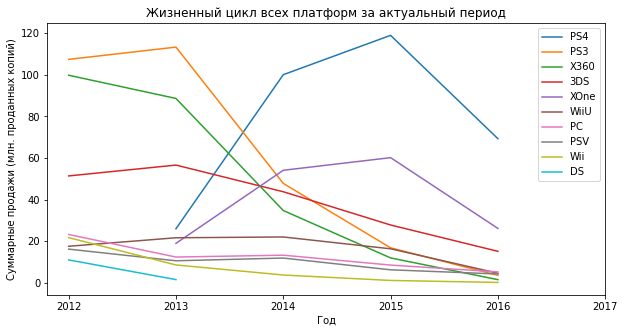

In [43]:
for name in actual_platforms: # Цикл проходит по каждому элементу в списке actual_platforms
    (
    current_period.query('platform == @name') # фильтрация current_period, оставляя только строки, где значение в столбце platform равно текущей платформе из цикла
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum') # создание сводной таблицы с индексом year_of_release и значениями total_sales, используя агрегатную функцию sum.
    .sort_values('year_of_release', ascending = False)['total_sales'] # сортировка по year_of_release в порядке убывания и выбор столбца total_sales
    .plot(kind='line', figsize = (10, 5), label=name)  
    )
    plt.title('Жизненный цикл всех платформ за актуальный период')
    plt.xticks(np.arange(2012, 2018, step=1))
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи (млн. проданных копий)')
    plt.legend()

**<font color="maroon">Спасибо, поправила</font>**

По состоянию на 2016 год отсутствуют возрастающие продажи. Продажи падают на всех консолях.  
Более или менее дела обстоят у консолей PS4 и XOne но у них также прослеживаются сильный спад продаж.

3.5 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат

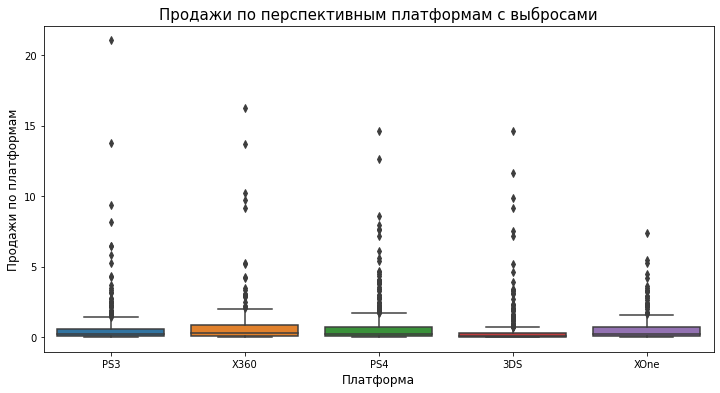

In [44]:
# Список из 5 платформ
top_5_platforms = ['PS4', 'PS3', 'X360', '3DS', 'XOne']

# Фильтрация данных для этих платформ
filtered_data = current_period[current_period['platform'].isin(top_5_platforms)]

# Построение графика
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='platform', y='total_sales')
plt.title('Продажи по перспективным платформам с выбросами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи по платформам', fontsize=12)
plt.show()

**<font color="maroon">Спасибо, поправила</font>**

In [45]:
current_period['total_sales'].describe()

count    2886.000000
mean        0.501223
std         1.249157
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total_sales, dtype: float64

In [46]:
# посмотрим на общее количество вышедших игр на каждую платформу, и на средние глобальные продажи
current_period.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


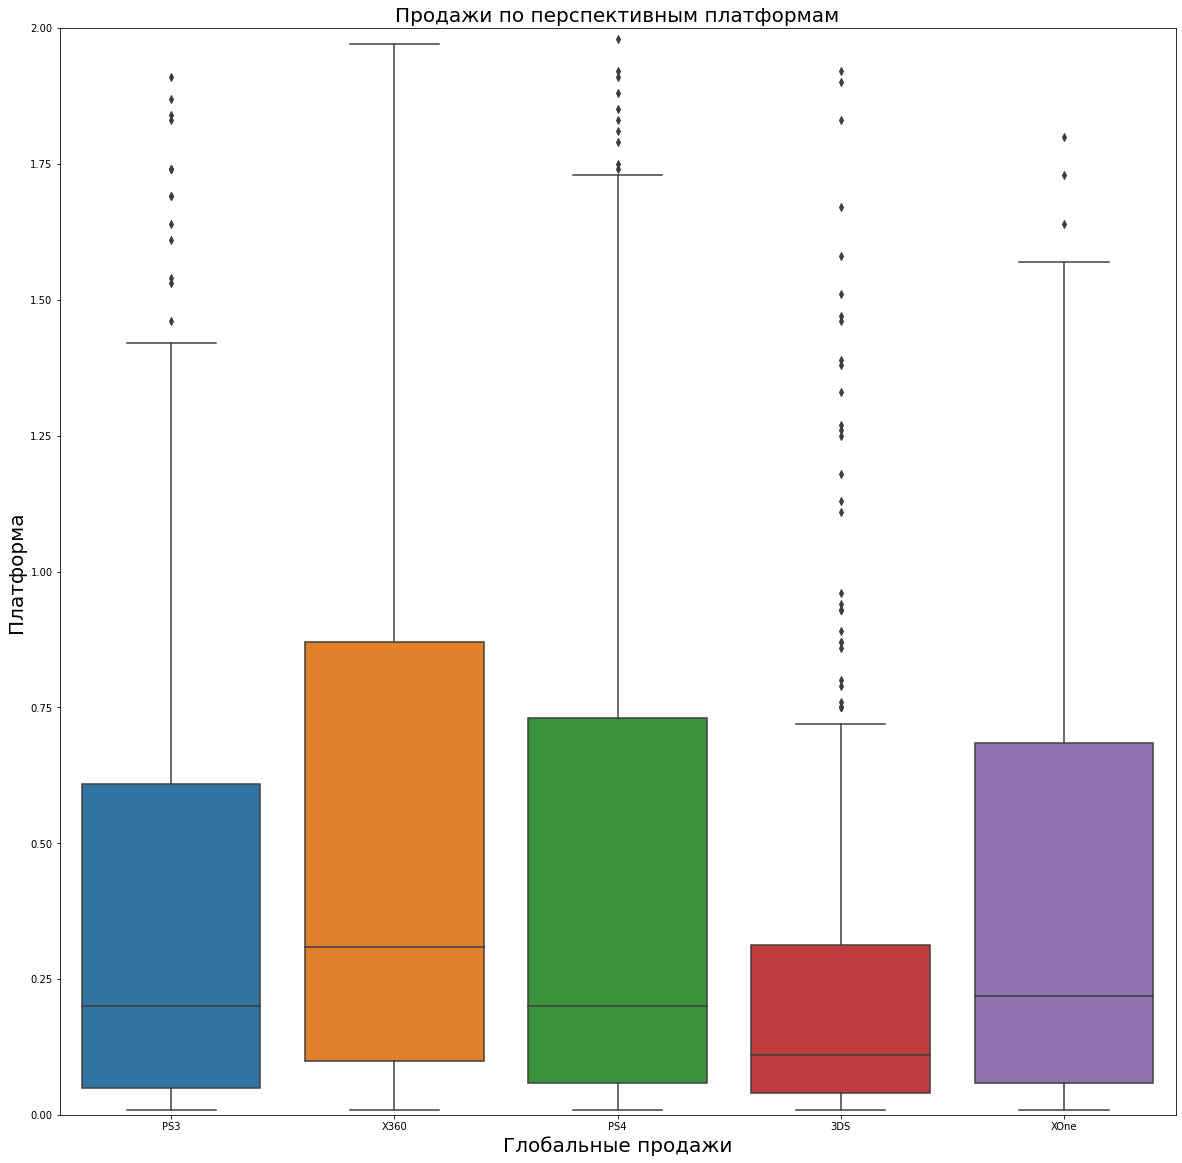

In [47]:
# Список из 5 платформ
top_5_platforms = ['PS4', 'PS3', 'X360', '3DS', 'XOne']

# Фильтрация данных для этих платформ
filtered_data = current_period[current_period['platform'].isin(top_5_platforms)]

#Рисуем ящики с усами без выбросов
plt.figure(figsize=(20,20))
sns.boxplot(data=filtered_data, y='total_sales', x='platform', orient = "v")
plt.title('Продажи по перспективным платформам', fontsize=20)
plt.xlabel('Глобальные продажи', fontsize=20)
plt.ylabel('Платформа',fontsize=20)
plt.ylim(0, 2)  # Установка предела оси Y от 0 до 2
plt.show()

 Больше всего продаж за выбранный период времени у X360, PS4, XOne и Wii. Меньше всего продавались игры для PSP и PSV.

3.6 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Отберем 5 платформ с максимальными продажами

In [48]:
actual_5_platforms = (current_period
    
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index().head(5)['platform'].tolist()
    )                         
actual_5_platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne']

3.6.1 Посчитаем корреляцию между отзывами пользователей и критиков и продажами

значения коэффициента корреляции (r):

r=1: Идеальная положительная корреляция. Это означает, что по мере увеличения одной переменной, другая также увеличивается на фиксированное значение.

r=−1: Идеальная отрицательная корреляция. Это означает, что по мере увеличения одной переменной, другая уменьшается на фиксированное значение.

r=0: Отсутствие линейной корреляции. Это означает, что между двумя переменными нет линейной связи.

0<∣r∣<0.3: Слабая корреляция.

0.3≤∣r∣<0.7: Средняя корреляция.

∣r∣≥0.7: Сильная корреляция.

In [49]:
# Высчитаем корреляцию между оценками пользователей и продажами для PS4
sony_play_station_4 = current_period[current_period['platform']=='PS4']
print(sony_play_station_4['user_score'].corr(sony_play_station_4['total_sales']).round(2))

-0.03


Text(0.5, 1.0, 'Корреляция между оценками пользователей и продажами')

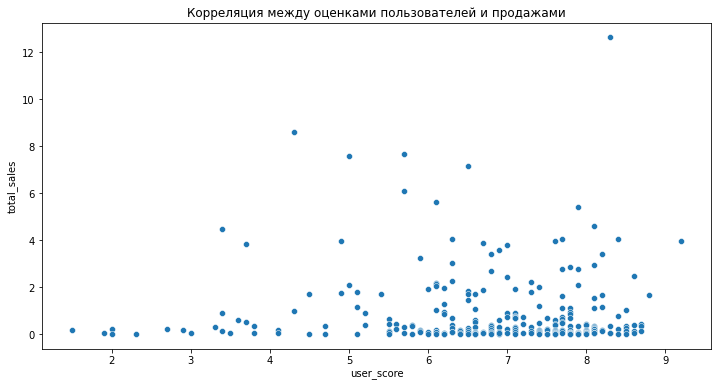

In [50]:
# Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=sony_play_station_4)
plt.title('Корреляция между оценками пользователей и продажами')

In [51]:
# Высчитаем корреляцию между оценками критиков и продажами для PS4
sony_play_station_4 = current_period[current_period['platform']=='PS4']
# Вычисление корреляции с игнорированием NaN значений и округление до 2 знаков после запятой
correlation = np.corrcoef(sony_play_station_4['critic_score'].fillna(0), sony_play_station_4['total_sales'].fillna(0))[0, 1].round(2)
print(correlation)

0.23


Text(0.5, 1.0, 'Корреляция между оценками критиков и продажами')

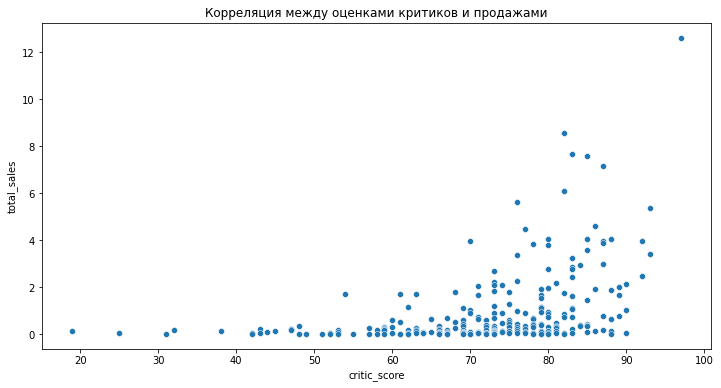

In [52]:
# Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=sony_play_station_4)
plt.title('Корреляция между оценками критиков и продажами')

Платформа: PS3
Корреляция между оценками пользователей и продажами: 0.00
Корреляция между оценками критиков и продажами: 0.33


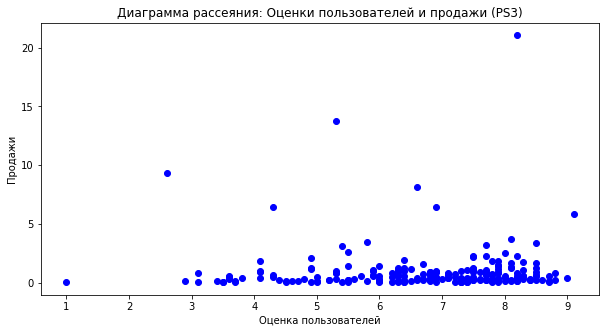

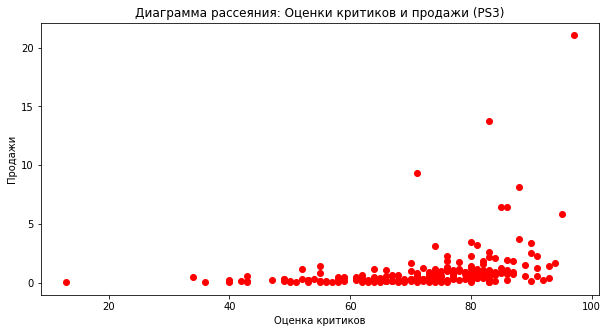

Платформа: X360
Корреляция между оценками пользователей и продажами: -0.00
Корреляция между оценками критиков и продажами: 0.36


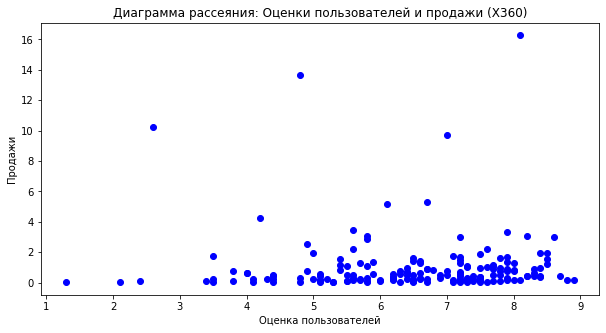

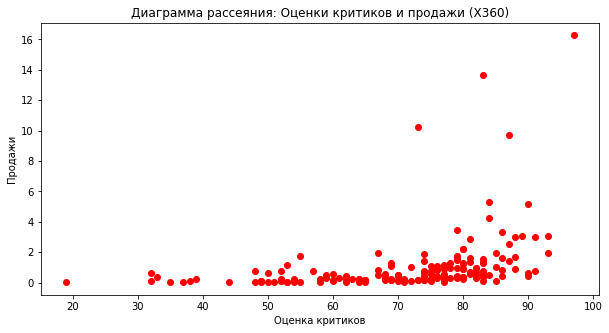

Платформа: 3DS
Корреляция между оценками пользователей и продажами: 0.20
Корреляция между оценками критиков и продажами: 0.31


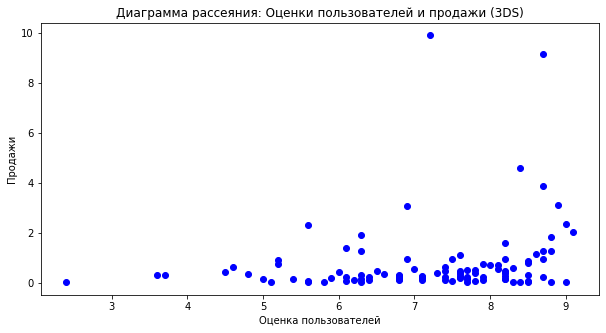

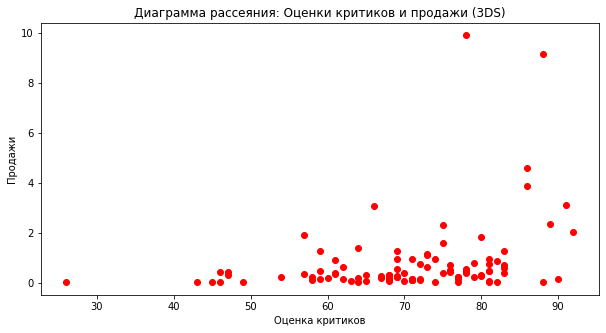

Платформа: XOne
Корреляция между оценками пользователей и продажами: -0.09
Корреляция между оценками критиков и продажами: 0.41


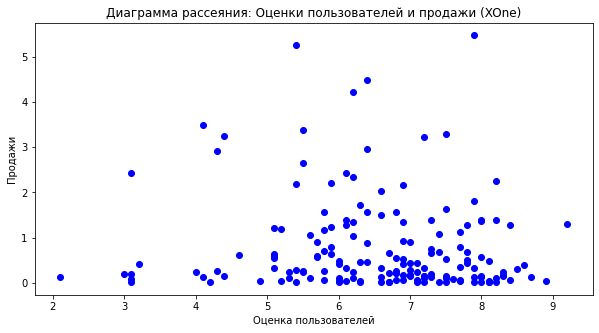

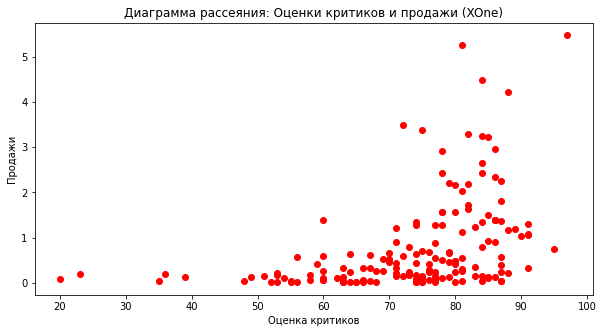

In [53]:
def compute_and_plot_correlations(correlations):
    platforms = ['PS3', 'X360', '3DS', 'XOne']
    
    for platform in platforms:
        # Фильтрация данных по платформе
        platform_correlations = correlations[correlations['platform'] == platform]
        
        # Удаление строк с NaN значениями для вычисления корреляций
        platform_correlations_clean = platform_correlations.dropna(subset=['critic_score', 'user_score', 'total_sales'])
        
        # Вычисление корреляции между оценками пользователей и продажами
        user_corr = platform_correlations_clean['user_score'].corr(platform_correlations_clean['total_sales'])
        
        # Вычисление корреляции между оценками критиков и продажами
        critic_corr = platform_correlations_clean['critic_score'].corr(platform_correlations_clean['total_sales'])
        
        # Печать корреляций
        print(f'Платформа: {platform}')
        print(f'Корреляция между оценками пользователей и продажами: {user_corr:.2f}')
        print(f'Корреляция между оценками критиков и продажами: {critic_corr:.2f}')
        
        # Построение диаграммы рассеяния для оценок пользователей и продаж
        plt.figure(figsize=(10, 5))
        plt.scatter(platform_correlations_clean['user_score'], platform_correlations_clean['total_sales'], color='blue')
        plt.title(f'Диаграмма рассеяния: Оценки пользователей и продажи ({platform})')
        plt.xlabel('Оценка пользователей')
        plt.ylabel('Продажи')
        plt.show()
        
        # Построение диаграммы рассеяния для оценок критиков и продаж
        plt.figure(figsize=(10, 5))
        plt.scatter(platform_correlations_clean['critic_score'], platform_correlations_clean['total_sales'], color='red')
        plt.title(f'Диаграмма рассеяния: Оценки критиков и продажи ({platform})')
        plt.xlabel('Оценка критиков')
        plt.ylabel('Продажи')
        plt.show()

# Пример вызова функции
compute_and_plot_correlations(current_period[['platform', 'critic_score', 'user_score', 'total_sales']])

Диаграммы распределения явно показывают на слабую связь между оценкой пользователей и продажами в разрезе отдельных платформ.
А влияние оценки критиков пусть и слабое, но все равно есть и возрастает по порядку в следующей последовательности: PC3, Х360, WiiU и XOne.

3.7 Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [54]:
# Создадим таблицу с названием жанра и количеством продаж, отсортируем жанры по убыванию
genre_data = current_period.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', 
 ascending=False).reset_index().rename_axis(None, axis=1)
display(genre_data)

,genre,total_sales
0,Action,441.12
1,Shooter,304.73
2,Role-Playing,192.80
3,Sports,181.07
4,Misc,85.04
5,Platform,61.00
6,Racing,53.50
7,Fighting,44.49
8,Simulation,35.12
9,Adventure,29.43


Text(0, 0.5, 'Продажи')

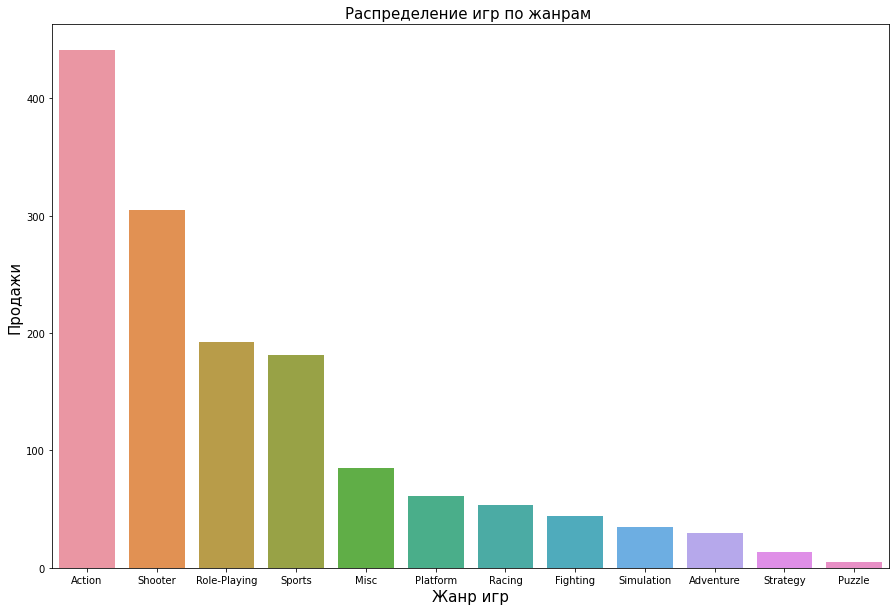

In [55]:
# Количество продаж игр различных жанров
plt.figure(figsize=(15,10))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=genre_data, x='genre', y='total_sales')
plt.xlabel('Жанр игр',fontsize=15)
plt.ylabel('Продажи',fontsize=15)

In [56]:
current_period.groupby('genre')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,1031.0,0.427856,1.166504,0.01,0.030,0.120,0.3900,21.05
Adventure,302.0,0.097450,0.208237,0.01,0.020,0.030,0.0775,1.66
Fighting,109.0,0.408165,0.910385,0.01,0.060,0.130,0.3600,7.55
Misc,192.0,0.442917,1.081047,0.01,0.030,0.120,0.3375,9.18
Platform,85.0,0.717647,1.364413,0.01,0.090,0.210,0.6600,9.90
Puzzle,28.0,0.174643,0.305438,0.01,0.020,0.045,0.1025,1.19
Racing,115.0,0.465217,0.888664,0.01,0.050,0.140,0.4200,7.09
Role-Playing,370.0,0.521081,1.315937,0.01,0.060,0.140,0.4075,14.60
Shooter,235.0,1.296723,2.251662,0.01,0.135,0.440,1.4800,14.63


Text(0, 0.5, 'Жанр')

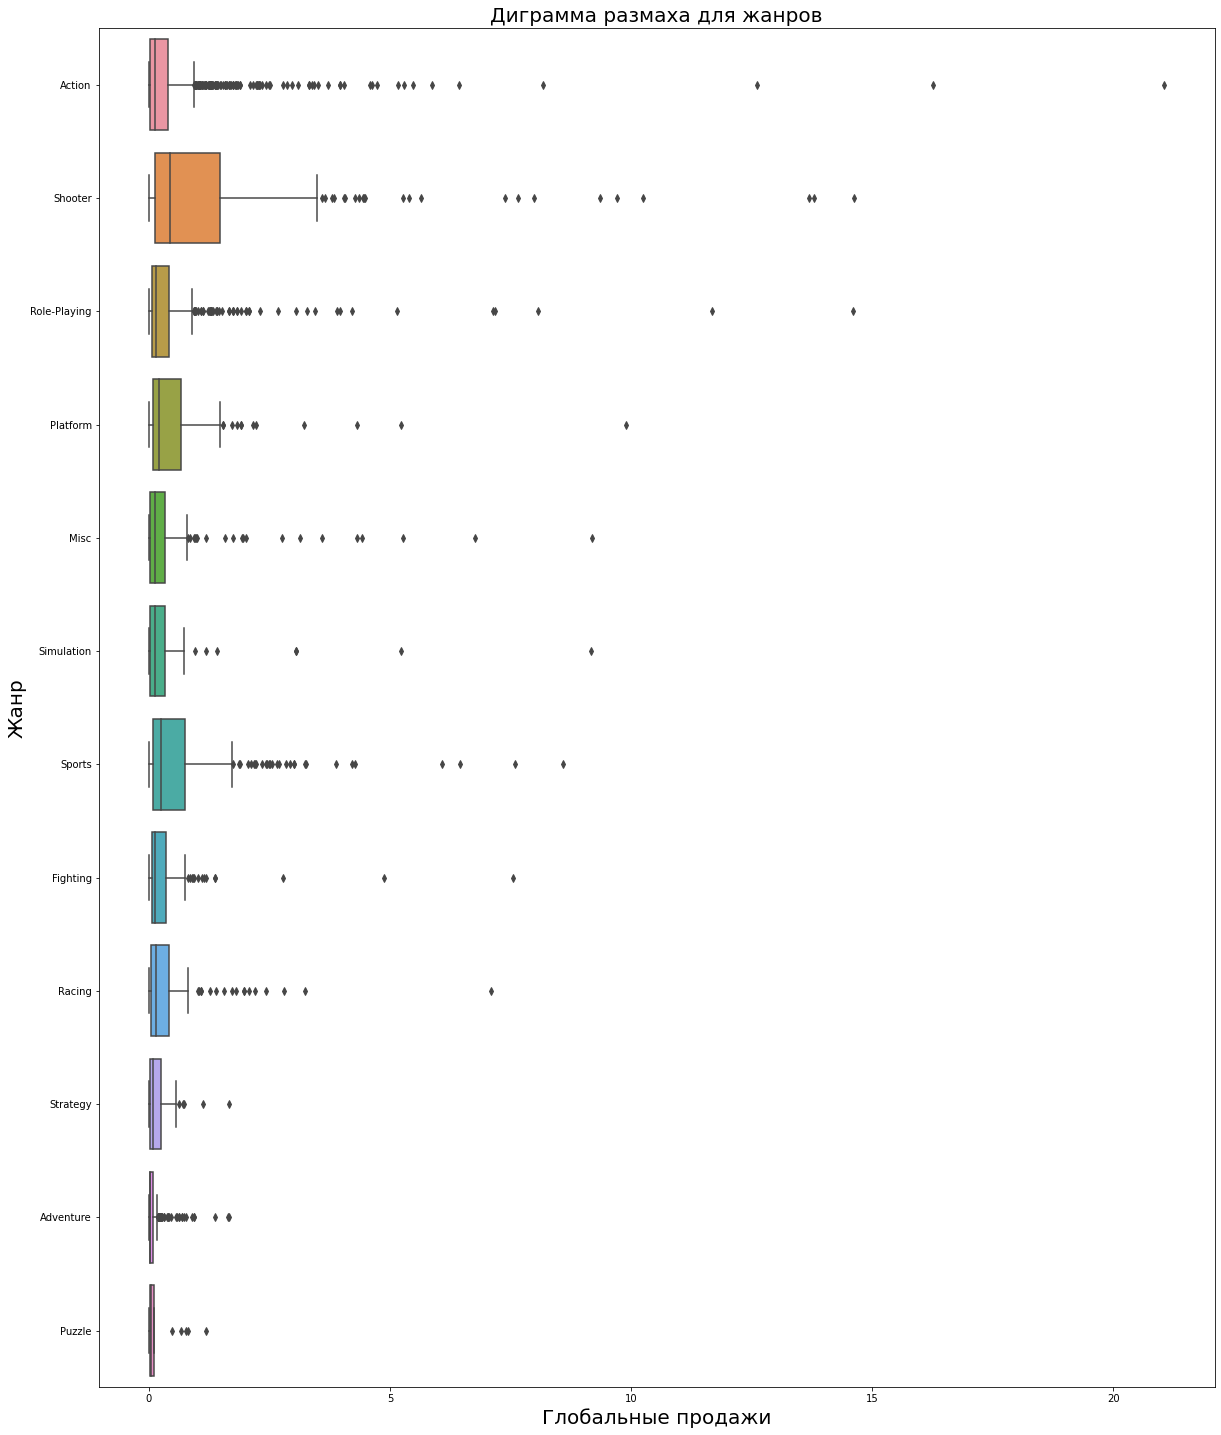

In [57]:
# Диаграмма размаха для жанров
plt.figure(figsize=(20,25))
sns.boxplot(data=current_period, x='total_sales', y='genre', orient = "h")
plt.title('Диграмма размаха для жанров', fontsize=20)
plt.xlabel('Глобальные продажи', fontsize=20)
plt.ylabel('Жанр',fontsize=20)

(0.0, 4.0)

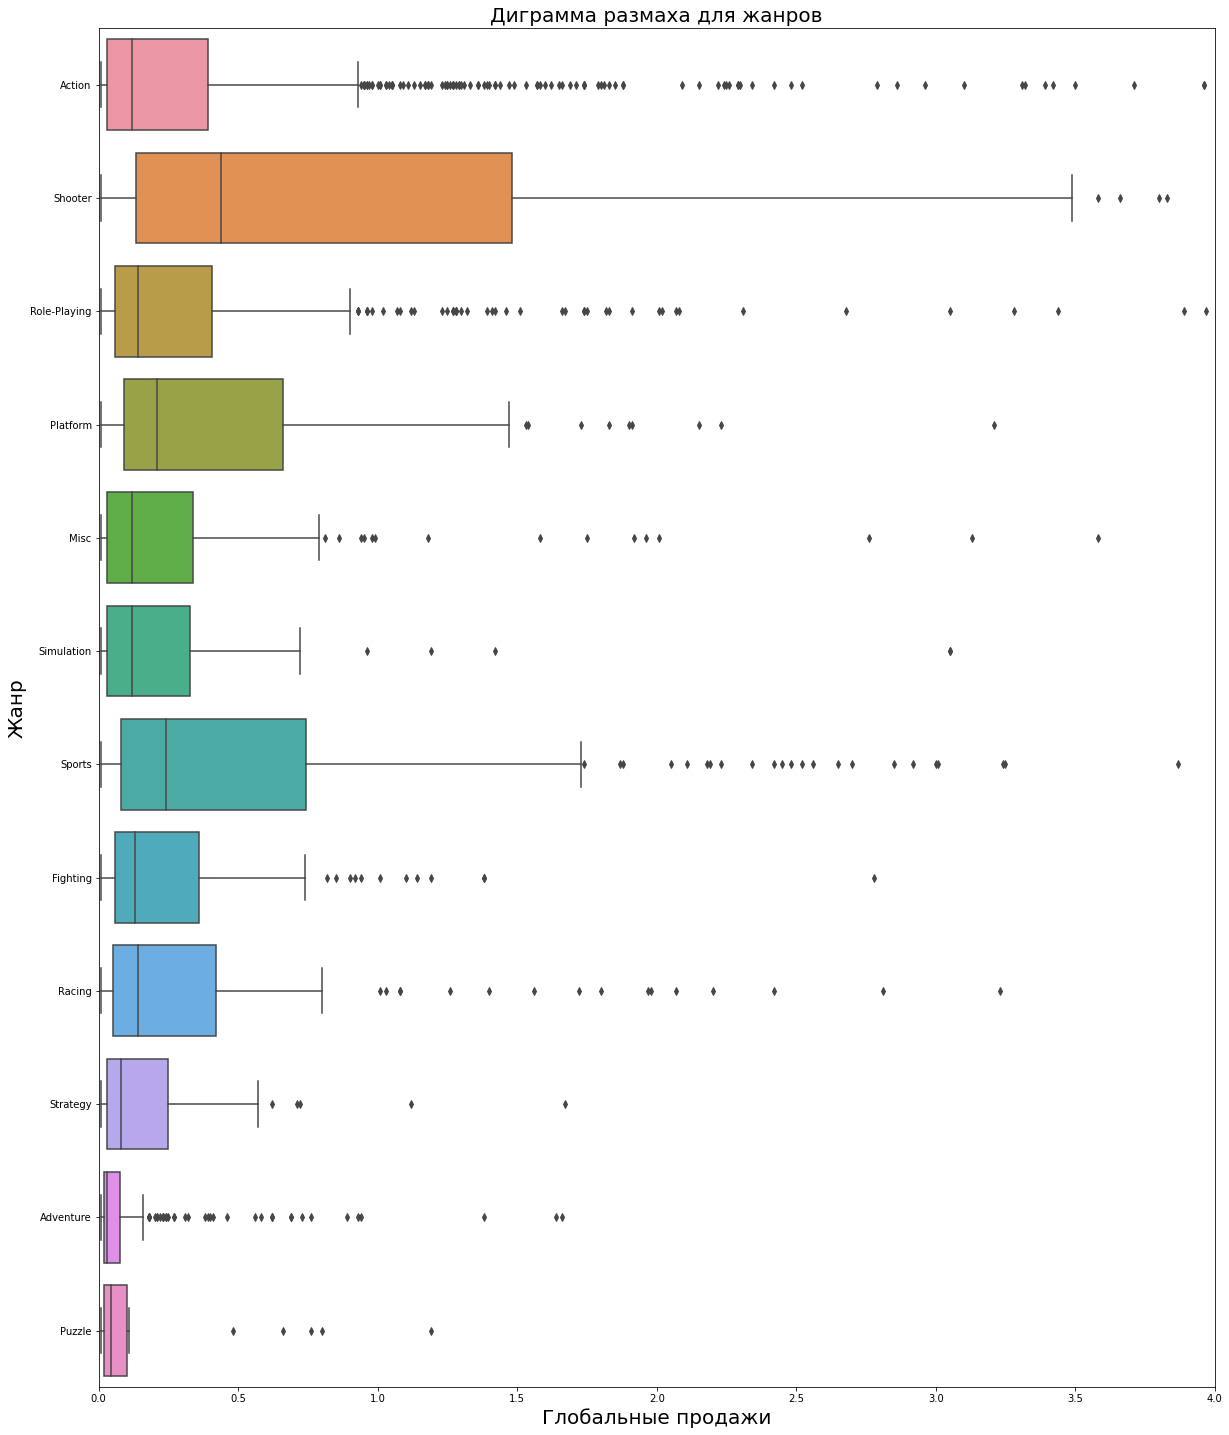

In [58]:
# Диаграмма размаха без выбросов
plt.figure(figsize=(20,25))
sns.boxplot(data=current_period, x='total_sales', y='genre', orient = "h")
plt.title('Диграмма размаха для жанров', fontsize=20)
plt.xlabel('Глобальные продажи', fontsize=20)
plt.ylabel('Жанр',fontsize=20)
plt.xlim(0, 4)

In [59]:
current_period_genre = pd.pivot_table(current_period, index='genre', values='total_sales', aggfunc={'total_sales': ['sum', 'mean', 'median']})

display(current_period_genre.sort_values('sum', ascending=False))

,mean,median,sum
genre,,,
Action,0.427856,0.120,441.12
Shooter,1.296723,0.440,304.73
Role-Playing,0.521081,0.140,192.80
Sports,0.675634,0.240,181.07
Misc,0.442917,0.120,85.04
Platform,0.717647,0.210,61.00
Racing,0.465217,0.140,53.50
Fighting,0.408165,0.130,44.49
Simulation,0.439000,0.120,35.12


**Вывод** 

За последние 5 лет наиболее востребованными являются жанры игр Action, Shooter. Следом идут Role-Playing и Sports. На последнем месте жанр Puzzle.  

Дополнительное исследование и сравнение медианных значений по продажам в разрезе жанров указывает, что предпочтение в жанрах надо отдавать Shooter, Sports обладающими большими медианными значениями прибыли.

**Общий вывод по главе "Исследовательский анализ данных".** 

Определили, что актуальный период составляет 5 последних лет.  
В 2016 году нет явно возрастающих продаж, продажи падают на всех консолях.  
Более или менее перспективными являются консоли PS4 и XOne, но у них также прослеживаются уменьшения продаж.
Связь между оценками пользователей и продажами - слабая.  
Связь между оценками критиков и продажами - умеренная.  
При планировании продаж предпочтение в жанрах игр следует отдавать Action, Shooter, Sports.

## Шаг 4. Составление портрета пользователя каждого региона

4.1 Определим самые популярные платформы (топ-5). Опишем различия в долях продаж.

In [60]:
print(current_period.columns.tolist())

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating', 'total_sales']


In [61]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

def top_5(region, by_col='platform'):
    # Группировка данных по столбцу 'by_col' ('platform') и суммирование продаж в регионе 'region'
    df_sales = current_period.groupby(by=by_col)[region].agg('sum').sort_values(ascending=False).to_frame()
    
    # Получение индексов топ-5 платформ по суммарным продажам
    top_5 = df_sales[:5].index
    
    # Замена индексов на 'Other' для всех платформ, кроме топ-5
    df_sales.index = df_sales.index.where(df_sales.index.isin(top_5), 'Other')
    
    # Группировка данных по новому индексу и суммирование продаж
    return df_sales.groupby(by=df_sales.index)[region].agg('sum').sort_values(ascending=False)

# Использование функции для получения топ-5 платформ по регионам
# Функция pd.concat() используется для объединения результатов вызова функции top_5(region) для каждого региона из списка regions
top_5_sales_by_regions = pd.concat([top_5(region) for region in regions], axis=1) 
top_5_sales_by_regions.columns = regions  # Назначение имен столбцов
print(top_5_sales_by_regions)

          na_sales  eu_sales  jp_sales
platform                              
X360        140.05     74.52       NaN
PS4         108.74    141.09     15.96
PS3         103.38    106.86     35.29
XOne         93.12     51.59       NaN
Other        90.37     90.12     19.49
3DS          55.31     42.64     87.79
PSV            NaN       NaN     21.04
WiiU           NaN       NaN     13.01


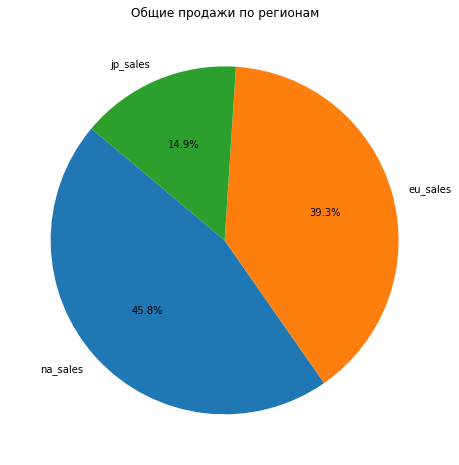

In [62]:
# Данные для круговой диаграммы
sales_sum = top_5_sales_by_regions.sum()

# Создание круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(sales_sum, labels=sales_sum.index, autopct='%1.1f%%', startangle=140)
plt.title('Общие продажи по регионам')
plt.show()

Больше всего игр продавалось в Северной Америке, а меньше всего в Японии.

In [63]:
top_5_sales_by_regions['na_sales'] = top_5_sales_by_regions['na_sales'].fillna(0)

In [64]:
top_5_sales_by_regions['eu_sales'] = top_5_sales_by_regions['eu_sales'].fillna(0)

In [65]:
top_5_sales_by_regions['jp_sales'] = top_5_sales_by_regions['jp_sales'].fillna(0)

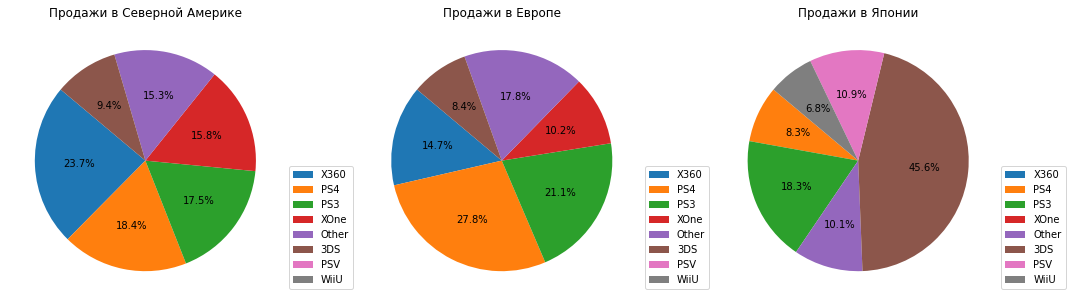

In [66]:
# Данные для круговых диаграмм
platforms = top_5_sales_by_regions.index
na_sales = top_5_sales_by_regions['na_sales']
eu_sales = top_5_sales_by_regions['eu_sales']
jp_sales = top_5_sales_by_regions['jp_sales']

# Функция для отображения процентов на круговой диаграмме
def autopct_func(pct):
    return ('%1.1f%%' % pct) if pct > 0 else ''

# Построение круговых диаграмм
plt.figure(figsize=(15, 5))

# Для NA Sales
plt.subplot(1, 3, 1)
plt.pie(na_sales, labels=None, autopct=autopct_func, startangle=140)
plt.title('Продажи в Северной Америке')
plt.legend(labels=platforms, loc='best', bbox_to_anchor=(1, 0.5))

# Для EU Sales
plt.subplot(1, 3, 2)
plt.pie(eu_sales, labels=None, autopct=autopct_func, startangle=140)
plt.title('Продажи в Европе')
plt.legend(labels=platforms, loc='best', bbox_to_anchor=(1, 0.5))

# Для JP Sales
plt.subplot(1, 3, 3)
plt.pie(jp_sales, labels=None, autopct=autopct_func, startangle=140)
plt.title('Продажи в Японии')
plt.legend(labels=platforms, loc='best', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

В Северной Америке самой распространенной оказалась Х360, также хорошей популярностью пользуются PS4.  
В Европе также лидируют PS4 и PS3.  
В Японии абсолютное большинство рынка заняла 3DS, а второй по полурярности является PS3.

4.2 Опишем самые популярные жанры (топ-5). Поясним разницу

In [67]:
regions_names = ['na_sales', 'eu_sales', 'jp_sales']
top_5_sales_by_genre = pd.concat([top_5(region, 'genre') for region in regions_names], axis=1)
top_5_sales_by_genre

,na_sales,eu_sales,jp_sales
genre,,,
Action,177.84,159.34,52.80
Shooter,144.77,113.47,NaN
Other,84.64,89.10,41.63
Sports,81.53,69.09,NaN
Role-Playing,64.00,48.53,65.44
Misc,38.19,NaN,12.86
Racing,NaN,27.29,NaN
Simulation,NaN,NaN,10.41
Fighting,NaN,NaN,9.44


In [68]:
top_5_sales_by_genre['na_sales'] = top_5_sales_by_genre['na_sales'].fillna(0)

In [69]:
top_5_sales_by_genre['eu_sales'] = top_5_sales_by_genre['eu_sales'].fillna(0)

In [70]:
top_5_sales_by_genre['jp_sales'] = top_5_sales_by_genre['jp_sales'].fillna(0)

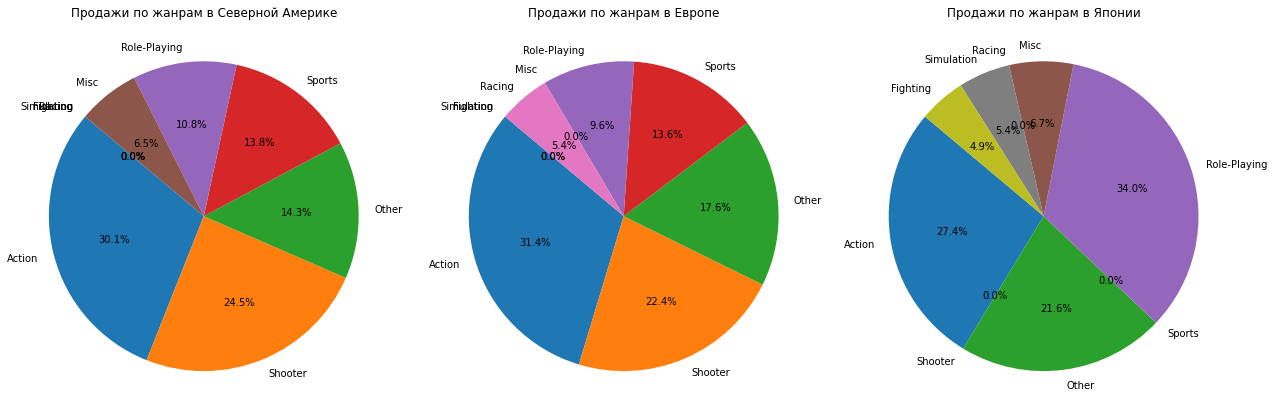

In [71]:
# Данные для круговых диаграмм
genres = top_5_sales_by_genre.index
na_sales = top_5_sales_by_genre['na_sales']
eu_sales = top_5_sales_by_genre['eu_sales']
jp_sales = top_5_sales_by_genre['jp_sales']

# Создание круговых диаграмм для каждого региона
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.pie(na_sales, labels=genres, autopct='%1.1f%%', startangle=140)
plt.title('Продажи по жанрам в Северной Америке')

plt.subplot(1, 3, 2)
plt.pie(eu_sales, labels=genres, autopct='%1.1f%%', startangle=140)
plt.title('Продажи по жанрам в Европе')

plt.subplot(1, 3, 3)
plt.pie(jp_sales, labels=genres, autopct='%1.1f%%', startangle=140)
plt.title('Продажи по жанрам в Японии')

plt.tight_layout()
plt.show()

В Америке первым по популярности является жанр Action, а вторым - Shooter.  
В Европе лидирующие позиции распределились аналогично.  
В Японии самый популярный жанр Role-Playing, следом идет Action.  
Жанр Action пользуется большой популярностью во всех регионах, а в Европе и Америке также достаточно популярны спортивные игры.

4.3 Опишем влияние рейтинга ESRB на продажи в отдельном регионе

In [72]:
regions_names = ['na_sales', 'eu_sales', 'jp_sales']
top_5_sales_by_rating = pd.concat([top_5(region, 'rating') for region in regions_names], axis=1)
top_5_sales_by_rating

,na_sales,eu_sales,jp_sales
rating,,,
M,231.57,193.96,21.20
E,114.37,113.03,28.33
unknown,103.31,91.50,108.84
E10+,75.70,55.37,8.19
T,66.02,52.96,26.02


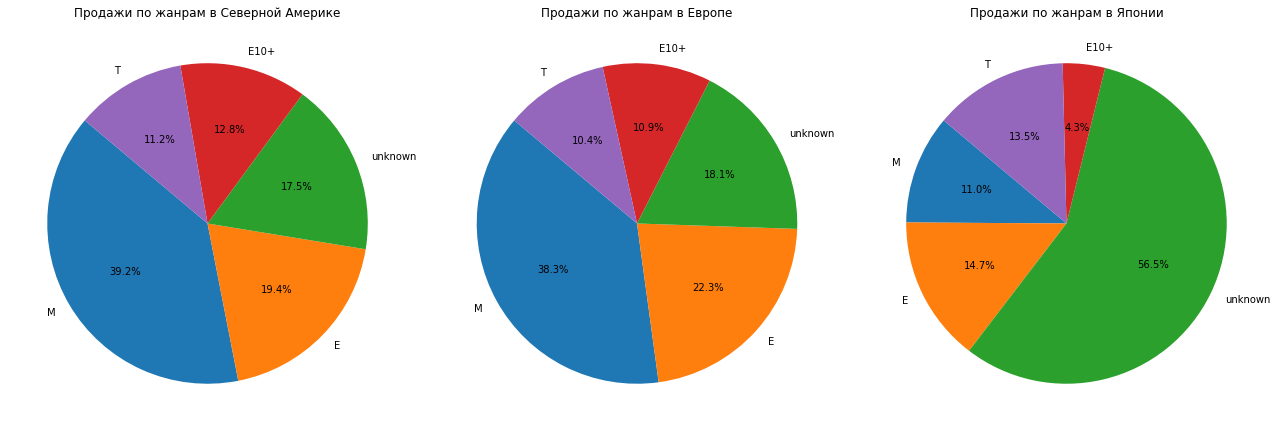

In [73]:
# Данные для круговых диаграмм
rating = top_5_sales_by_rating.index
na_sales = top_5_sales_by_rating['na_sales']
eu_sales = top_5_sales_by_rating['eu_sales']
jp_sales = top_5_sales_by_rating['jp_sales']

# Создание круговых диаграмм для каждого региона
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.pie(na_sales, labels=rating, autopct='%1.1f%%', startangle=140)
plt.title('Продажи по жанрам в Северной Америке')

plt.subplot(1, 3, 2)
plt.pie(eu_sales, labels=rating, autopct='%1.1f%%', startangle=140)
plt.title('Продажи по жанрам в Европе')

plt.subplot(1, 3, 3)
plt.pie(jp_sales, labels=rating, autopct='%1.1f%%', startangle=140)
plt.title('Продажи по жанрам в Японии')

plt.tight_layout()
plt.show()

В Европе и Северной Америке чаще всего покупали игры с рейтингом М. На 2-м месте доля игр с рейтингом Е (19% и 22% соответственно), на третьем месте игры с неопознанным рейтингом.  
В Японии самое широкое распространение получили игры с неопознанным рейтингом, на втором месте игры с рейтингом Е, на третьем месте игры с рейтингом Т.

**Общий вывод по разделу:** 

Самыми популярными платформами оказались PS4, X360, PS3, XOne, 3DS, PSV, WiiU.  
Больше всего игр продавалось в Северной Америке, а меньше всего в Японии.  

В Северной Америке и Европе самыми распространенными оказались Х360, PS4 и PS3.

В Японии абсолютное большинство рынка заняла 3DS, а второй по полурярности является PS3.
В Америке и Европе первым по популярности является жанр Action, а вторым - Shooter.
В Японии самым популярным жанром оказался Role-Playing, следом идет Action.

Также в Европе и Америке достаточно популярны спортивные игры.  

В Европе и Северной Америке чаще всего покупали игры с рейтингом М (на 2-м месте доля игр с рейтингом Е (19% и 22% соответственно, на третьем месте игры с неопознанным рейтингом), а в Японии самое широкое распространение получили игры с неопознанным рейтингом, на втором месте игры с рейтингом Е, на третьем месте игры с рейтингом Т.

## Шаг 5. Проверка гипотез

5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Выдвинем гипотезы:  
Нулевая гипотеза (Н0): Средние пользовательские рейтинги платформ XOne и PC равны.  
Альтернативная гипотеза (Н1): Средние пользовательские рейтинги платформ XOne и PC не равны.

In [74]:
# Сохраним в отдельные переменные данные о платформах
xbox_one = data[(data['platform'] == 'XOne') & (data['year_of_release'] > 2011)]['user_score']
pc = data[(data['platform'] == 'PC') & (data['year_of_release'] > 2011)]['user_score']

#Выведем средний рейтинг
print('Средний рейтинг пользователей для XOne', xbox_one.mean())
print('Средний рейтинг пользователей для PC', pc.mean())

Средний рейтинг пользователей для XOne 6.521428571428572
Средний рейтинг пользователей для PC 6.428640776699029


In [75]:
#проверяем гипотезы
alpha = 0.05

results = st.ttest_ind(xbox_one.dropna(), pc.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Проверка показала, что нет оснований отвергать нулевую гипотезу. И это верно, потому что средние рейтинги примерно равны.

5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Выдвинем гипотезы:

Нулевая гипотеза (Н0): Средние пользовательские рейтинги жанров Action и Sports равны.  
Альтернативная гипотеза (Н1): Средние пользовательские рейтинги жанров Action и Sports не равны

In [76]:
# Сохраним в отдельные переменные данные о жанрах
action_data = data[(data['genre'] == 'Action') & (data['year_of_release'] > 2011)]['user_score']
sports_data = data[(data['genre'] == 'Sports') & (data['year_of_release'] > 2011)]['user_score']

#Выведем средний рейтинг
print('Средний рейтинг жанра Action', action_data.mean())
print('Средний рейтинг жанра Sports', sports_data.mean())

Средний рейтинг жанра Action 6.825047801147227
Средний рейтинг жанра Sports 5.455897435897437


In [77]:
#проверяем гипотезы
alpha = 0.05

results = st.ttest_ind(action_data.dropna(), sports_data.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Проверка отвергла нулевую гипотезу о равном значении рейтингов.  

Результат средних пользовательских оценок каждого жанра наглядно показывают разницу

Пороговое значение alpha в обоих гипотезах задано = 0.05. Уровень значимости выбирается в зависимости от контекста исследований и последствий ошибки. Обычно, урочень значимости = 0.01 устанавливается в тех исследованиях, где ошибочный вывод может привести к серьезным последствиям (например, в медицинских исследованиях). Считаю возможным для наших исследований установить alpha = 0.05

Нулевая и альтернативная гипотезы в обоих исследованиях были сформулированы исходя из условия задач.

## Шаг 6. Общий вывод

В ходе исследования была проделана большая работа. 

На этапе подготовки данных были удалены строки с пропусками, заменен тип данных там, где это было необходимо
явные дубликаты в процессе обработки данных не были обнаружены.  

В процессе исследования выяснили, что за последние 5 лет наиболее востребованными являются жанры игр Action и Shooter. На последнем месте жанр Puzzle.  

В Америке и Европе первым по популярности является жанр Action, а вторым - Shooter. В Японии самым популярным жанром оказался Role-Playing, следом идет Action.

Также в Европе и Америке достаточно популярны спортивные игры.

Более или менее перспективными для продаж являются консоли PS4, X360, PS3, XOne, 3DS, PSV, WiiU. При этом, согласно полученным данным, видно, что продажи всех консолей год от года падают.

Больше всего игр продавалось в Северной Америке, а меньше всего в Японии.

В Северной Америке и Европе самыми распространенными оказались Х360, PS4 и PS3.

В Японии абсолютное большинство рынка заняла 3DS, а второй по полурярности является PS3. 

В Европе и Северной Америке чаще всего покупали игры с рейтингом М («Mature» — «Для взрослых), на 2-м месте доля игр с рейтингом Е («Everyone» — «Для всех») (19% и 22% соответственно, на третьем месте игры с неопознанным рейтингом), а в Японии самое широкое распространение получили игры с неопознанным рейтингом, на втором месте игры с рейтингом Е, на третьем месте игры с рейтингом Т («Teen» — «Подросткам»).


Рекоммендации для кампании на 2017 год.

Считаю, что следует сделать ставку на консоли нового поколения с поправкой на их популярность в регионе.  
Такая же ситуация с жанром.  

Судя по полулярности рейтинга M - основная часть геймеров старше 17 лет.  

Также рекомендуется учитывать рейтинг критиков на вышедшую игру.  

Необходимо учесть тот факт, что в конце актуального периода продажи игр падают по всем платформам, следовательно выручка в 2017 году будет меньше чем в 2016 до тех пор, пока не появятся консоли нового поколения.  


Таким образом, для целей увеличения прибыли интернет-магазину "Стримчик" следует запланировать проведение рекламных компаний игр на потенциально популярные продукты, а именно: платформа PS4, 3DS (для Японии) жанры Action, Shooter, Sports (и Role-Playing для Японии) с рейтингом M и Е.